In [1]:
import os, sys
from pathlib import Path

syndp_path = Path().cwd().parents[1].joinpath('Syndp/src')
sys.path.append(syndp_path.as_posix())

from syndp import timedp_algorithm as tdp

In [2]:
import numpy as np
import pandas as pd

x = [x for x in range(0, 1000)]

noise = np.random.rand(1000)
data = np.add(np.sin(x), noise)

In [3]:
data = data.reshape(-1, 10)

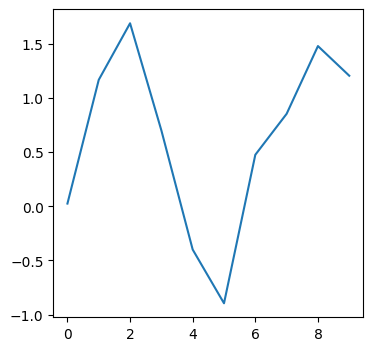

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(data[0])
plt.show()

In [5]:
dp = tdp.TimeDP(0.1, 0, 'laplace', seed=10)
dp_object = tdp.Vector_creator(data[0], dp)

new_data = dp_object.new_vector

plt.figure(figsize=(4,4))
plt.plot(new_data);

created boundary list and making new gradients..


TypeError: object of type 'numpy.float64' has no len()

## Testing with bounded laplace mechanism

In [18]:
dp = tdp.TimeDP(0.1, 0, 'vounded laplace', 10)
dp_object = tdp.Vector_creator(data[0], dp)

created boundary list and making new gradients..
creating boundary list


In [19]:
new_data = dp_object.new_vector

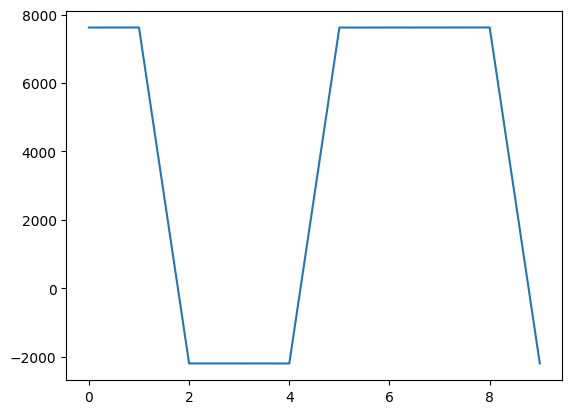

In [20]:
plt.plot(new_data)

## Testing interpolation

In [40]:
from scipy import interpolate

In [41]:
def make_extended_vector(vector : np.array):
    '''
    This function takes a given function and outputs a extended version of the vector
    The extended values are the linear interpolated values
    '''
    length_of_timestep = len(vector)
    xs = [2*x+1 for x in range(0,length_of_timestep)]
    new_xs = [x for x in range(0,2*length_of_timestep)]
    
    f = interpolate.interp1d(xs, vector, fill_value='extrapolate')
    
    return f(new_xs)

In [52]:
extended = make_extended_vector(data[1])

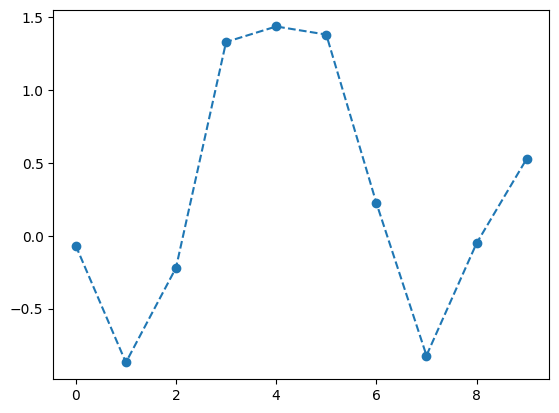

In [53]:
plt.plot(data[1], 'o--')

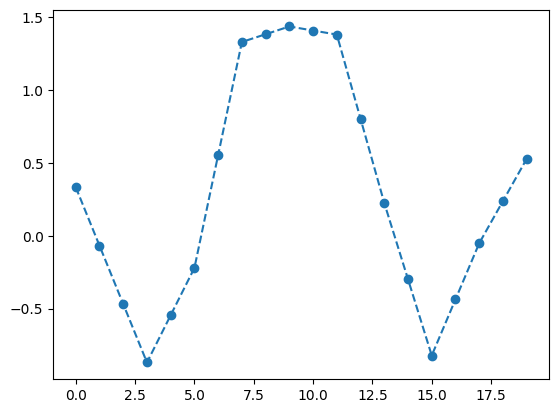

In [54]:
plt.plot(extended, 'o--')

## calculating gradient

In [64]:
xs = np.linspace(0.001, 1, 100)

def output(x):
    return np.sqrt(1-x**2)

ys = output(xs)

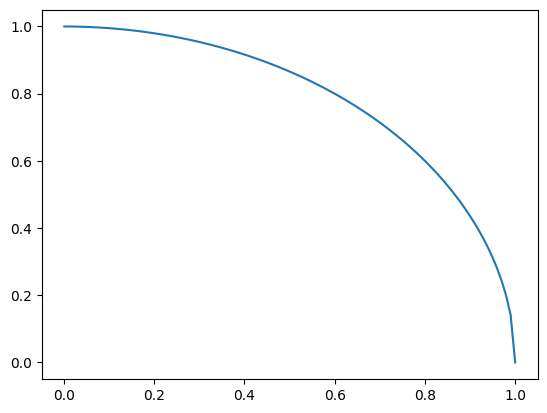

In [67]:
plt.plot(xs, ys)

In [68]:
ys

array([0.9999995 , 0.99993849, 0.99977564, 0.99951089, 0.99914416,
       0.99867534, 0.99810428, 0.99743082, 0.99665473, 0.99577579,
       0.99479372, 0.99370821, 0.99251892, 0.99122549, 0.9898275 ,
       0.9883245 , 0.98671603, 0.98500156, 0.98318053, 0.98125236,
       0.97921641, 0.97707201, 0.97481844, 0.97245495, 0.96998072,
       0.96739492, 0.96469663, 0.96188493, 0.9589588 , 0.9559172 ,
       0.95275902, 0.9494831 , 0.94608821, 0.94257307, 0.93893634,
       0.93517658, 0.93129232, 0.92728198, 0.92314392, 0.91887642,
       0.91447767, 0.90994576, 0.90527869, 0.90047437, 0.89553057,
       0.89044498, 0.88521516, 0.87983853, 0.87431238, 0.86863387,
       0.86279997, 0.85680753, 0.85065318, 0.84433339, 0.83784442,
       0.83118229, 0.82434282, 0.81732155, 0.81011375, 0.8027144 ,
       0.79511816, 0.78731931, 0.77931179, 0.77108909, 0.76264424,
       0.75396979, 0.74505772, 0.73589938, 0.72648548, 0.71680593,
       0.70684983, 0.69660532, 0.68605948, 0.67519819, 0.66400